<a href="https://colab.research.google.com/github/aryansinghal10/Synopsys-2022-2023/blob/main/Sentiment_Analysis_5_(25GB_RAM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Context
The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.

Content
Full tweet texts are provided with their labels for training data.
Mentioned users' username is replaced with @user.

#Imports

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #for visualization
import matplotlib.pyplot as plt #for visualization

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # WordCloud
from PIL import Image

import nltk
nltk.download('popular')
from nltk.corpus import stopwords

import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB #for discrete values
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

#Loading the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
train_set = pd.read_csv("/content/drive/MyDrive/SynopsysTwitter/train.csv")
test_set = pd.read_csv("/content/drive/MyDrive/SynopsysTwitter/test.csv")

In [ ]:
train_set

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


0 label = Positive Tweet

1 label = Negative Tweet

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
train_set.shape

(31962, 3)

In [ ]:
train_set['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [ ]:
train_set = train_set.drop("id", axis = 1)
test_set = test_set.drop("id", axis = 1)
train_set.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


#Exploring the Dataset

**EXPLORING UNCLEANED DATASET**

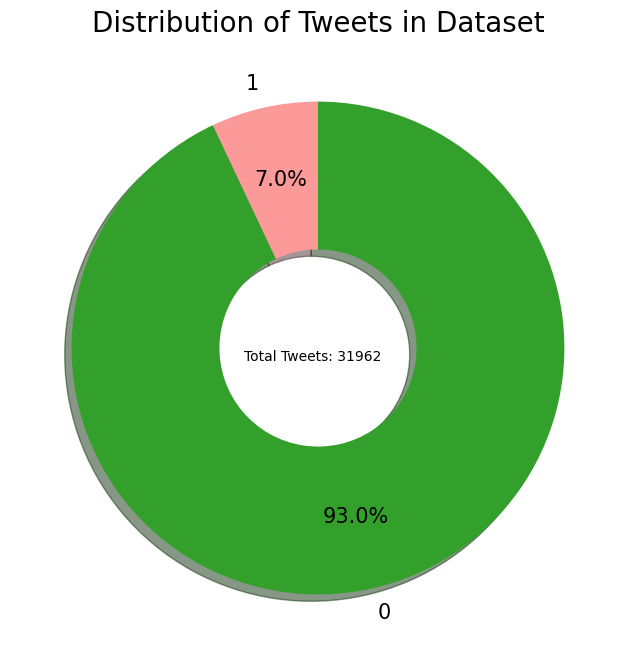

In [ ]:
plt.figure(figsize = (8,8))
sorted_counts = train_set['label'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : .6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
        colors = sns.color_palette("Paired")[3:])
plt.text(x = -0.3, y = -0.05, s = 'Total Tweets: {}'.format(train_set.shape[0]))
plt.title('Distribution of Tweets in Dataset', fontsize = 20);

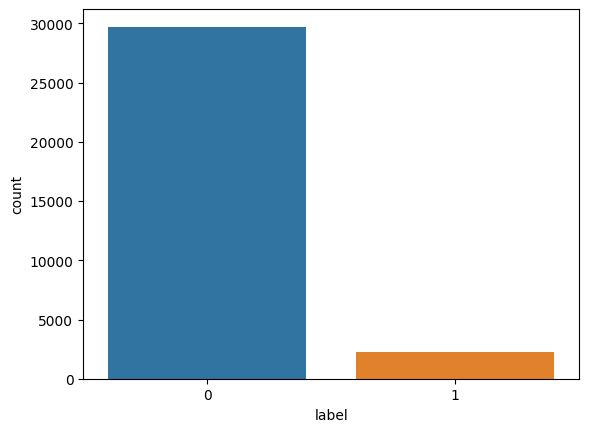

In [ ]:
sns.countplot(x = train_set['label'])
plt.show()

In [ ]:
len(train_set)

31962

In [ ]:
length = list()
for i in range(len(train_set)):
    length.append(len(train_set.iloc[i,1]))

train_set['length'] = length

train_set.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


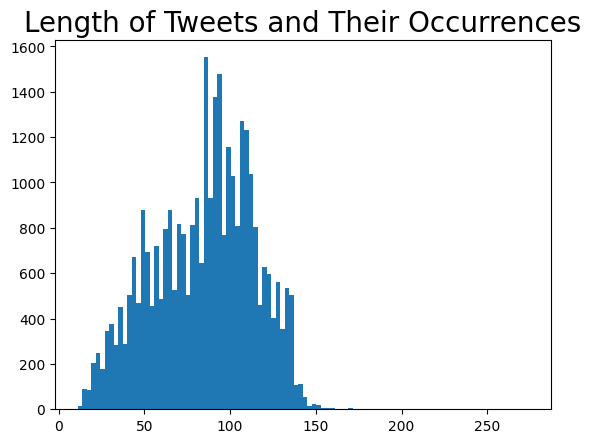

In [ ]:
plt.hist(train_set['length'], bins = 100)
plt.title('Length of Tweets and Their Occurrences', fontsize = 20);
plt.show()

In [ ]:
train_set.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


Shortest Tweet

In [ ]:
train_set[train_set['length'] == min(train_set['length'])]['tweet'].iloc[0]

'i love you '

Longest Tweet

In [ ]:
train_set[train_set['length'] == max(train_set['length'])]['tweet'].iloc[0]

' @user lmfao pathetic #soit   #growup #funny #noonethere #iknowwhoitis ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82â\x80¦'

Average Length Tweet

In [ ]:
train_set[train_set['length'] == 84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

In [ ]:
positive = train_set[train_set['label'] == 0]
positive.describe()

,label,length
count,29720.0,29720.000000
mean,0.0,84.328634
std,0.0,29.566484
min,0.0,11.000000
25%,0.0,62.000000
50%,0.0,88.000000
75%,0.0,107.000000
max,0.0,274.000000


In [ ]:
negative = train_set[train_set['label'] == 1]
negative.describe()

,label,length
count,2242.0,2242.000000
mean,1.0,90.187779
std,0.0,27.375502
min,1.0,12.000000
25%,1.0,69.000000
50%,1.0,96.000000
75%,1.0,111.000000
max,1.0,152.000000


In [ ]:
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [ ]:
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


## WordClouds

Negative

Mounted at /content/drive


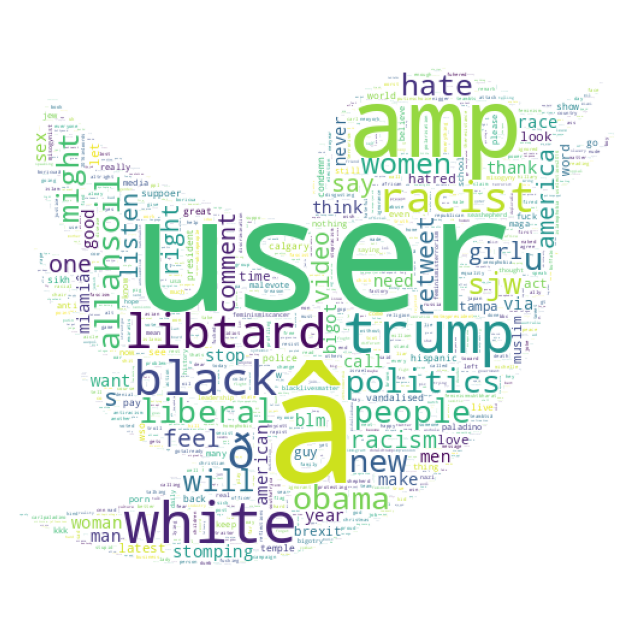

In [ ]:
drive.mount('/content/drive', force_remount = True)
tw_mask = np.array(Image.open('/content/drive/MyDrive/SynopsysTwitter/twitter.png'))

negative_sentences = negative['tweet'].tolist()
combined_negative_sentences = " ".join(negative_sentences)

wc = WordCloud(background_color = "white",
               width = 600, mask = tw_mask,
               height = 600,
               contour_width = 0,
               contour_color = "red",
               max_words = 1500,
               scale = 1,
               collocations = False,
               repeat = True,
               min_font_size = 1)
wc.generate(combined_negative_sentences)

plt.figure(figsize = [8, 8])
plt.imshow(wc)
plt.axis("off")
plt.savefig("wordcloud hate", dpi = 1000)
plt.show()

Positive

Mounted at /content/drive


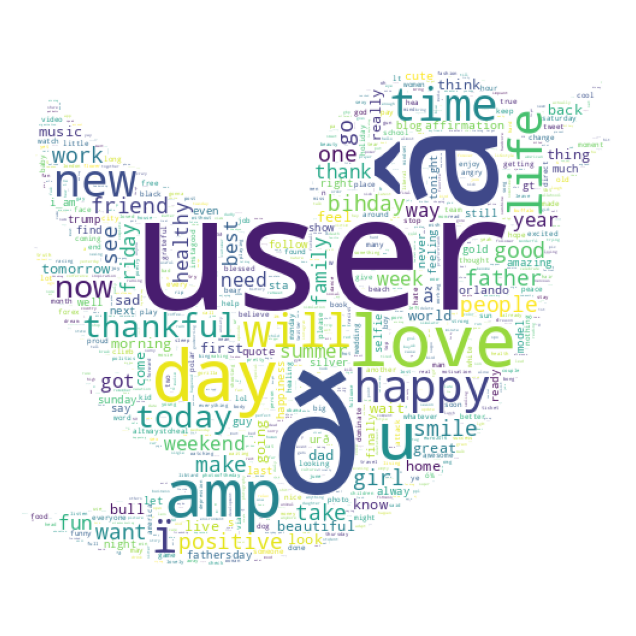

In [ ]:
drive.mount('/content/drive', force_remount = True)
tw_mask = np.array(Image.open('/content/drive/MyDrive/SynopsysTwitter/twitter.png'))

sentences = train_set['tweet'].tolist()
combined_sentences = " ".join(sentences)

wc = WordCloud(background_color = "white",
               width = 600, mask = tw_mask,
               height = 600,
               contour_width = 0,
               contour_color = "red",
               max_words = 1000,
               scale = 1,
               collocations = False,
               repeat = True,
               min_font_size = 1)
wc.generate(combined_sentences)

plt.figure(figsize = [8, 8])
plt.imshow(wc)
plt.axis("off")
plt.show()

#Cleaning the Data

In [ ]:
train_set.shape

(31962, 3)

In [ ]:
train_set.drop_duplicates(inplace = True)
train_set.shape

(29530, 3)

In [ ]:
train_set.isnull().sum()

label     0
tweet     0
length    0
dtype: int64

In [ ]:
test_set.shape

(17197, 1)

In [ ]:
test_set.drop_duplicates(inplace = True)
test_set.shape

(16130, 1)

In [ ]:
test_set.isnull().sum()

tweet    0
dtype: int64

In [ ]:
print("Train set shape: {} and test set shape: {}".format(train_set.shape, test_set.shape))

Train set shape: (29530, 3) and test set shape: (16130, 1)


In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
st = stopwords.words('english')
st.append("and")

Remove Punctuation

In [ ]:
Test = "Goblin and Ninja FoR the win!!"
test_punc_removed = []
for char in Test:
    if char not in string.punctuation:
        test_punc_removed.append(char)
test_punc_removed = ''.join(test_punc_removed)

In [ ]:
test_punc_removed

'Goblin and Ninja FoR the win'

Remove Stopwords

In [ ]:
test_punc_st_removed = []
for char in test_punc_removed.split():
    if char.lower() not in st:
        test_punc_st_removed.append(char)
test_punc_st_removed = " ".join(test_punc_st_removed)  

In [ ]:
test_punc_st_removed

'Goblin Ninja win'

#Building Vector Model using CountVectorizer

Testing with sample list

In [ ]:
sample_data = ["This is my first paper", "This is the second document", "here is the third thi one"]

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
X = vectorizer.fit_transform(sample_data)

In [ ]:
vectorizer.get_feature_names_out()

array(['document', 'first', 'here', 'is', 'my', 'one', 'paper', 'second',
       'the', 'thi', 'third', 'this'], dtype=object)

In [ ]:
X.toarray()

array([[0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1],
       [0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0]])

Creating a pipeline which removes punctuation, stopwords and peforms tokenization

In [ ]:
def message_cleaning(message):
    test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed = ''.join(test_punc_removed)
    test_punc_st_removed = []
    for char in test_punc_removed.split():
        if char.lower() not in st:
            test_punc_st_removed.append(char)
    test_punc_st_removed = " ".join(test_punc_st_removed)  
    return test_punc_st_removed

In [ ]:
message_cleaning("Goblin and Ninja fOR thE win!!")

'Goblin Ninja win'

In [ ]:
train_set_clean = train_set['tweet'].apply(message_cleaning)

In [ ]:
train_set['tweet'][7]

"the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl"

In [ ]:
train_set_clean[7]

'next school year year examsð\x9f\x98¯ cant think ð\x9f\x98\xad school exams hate imagine actorslife revolutionschool girl'

In [ ]:
data = train_set_clean.tolist()

In [ ]:
#tweets_countvectorizer = CountVectorizer().fit_transform(data).toarray()

In [ ]:
tweets_vectorizer = CountVectorizer()

In [ ]:
tweets_countvectorizer = tweets_vectorizer.fit_transform(data).toarray()

In [ ]:
tweets_countvectorizer.shape

(29530, 43671)

In [ ]:
X = tweets_countvectorizer
y = train_set['label']

In [ ]:
drive.mount('/content/drive', force_remount = True)
tw_mask = np.array(Image.open('/content/drive/MyDrive/SynopsysTwitter/twitter.png'))

negative = train_set_clean[train_set['label'] == 1]
negative_sentences = negative['tweet'].tolist()
combined_negative_sentences = " ".join(negative_sentences)

wc = WordCloud(background_color = "white",
               width = 600, mask = tw_mask,
               height = 600,
               contour_width = 0,
               contour_color = "red",
               max_words = 1500,
               scale = 1,
               collocations = False,
               repeat = True,
               min_font_size = 1)
wc.generate(combined_negative_sentences)

plt.figure(figsize = [8, 8])
plt.imshow(wc)
plt.axis("off")
plt.savefig("CLEANED wordcloud hate", dpi = 1000)
plt.show()

Mounted at /content/drive


KeyError: ignored

##Using Naive Bayes to Classify

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
NB_classifier = MultinomialNB()

In [ ]:
NB_classifier.fit(X_train, y_train)

In [ ]:
y_pred = NB_classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
linewidths = 2
linecolor = "yellow"

sns.heatmap(cm, linewidths=linewidths, linecolor=linecolor, annot = True)

In [ ]:
print(accuracy_score(y_test, y_pred) * 100)

In [ ]:
print(classification_report(y_test, y_pred))

#Predict

In [ ]:
naren_data = ['I hate black racist trump', 'I love this']

In [ ]:
E_count = tweets_vectorizer.transform(naren_data)

In [ ]:
E_count.toarray()

In [ ]:
n_pred = NB_classifier.predict(E_count)

In [ ]:
print(n_pred)

# Trump

In [ ]:
trump_df = pd.read_csv('/content/tweets.csv')

In [ ]:
trump_df.head()

In [ ]:
trump_df = trump_df.drop("Unnamed: 0", axis = 1)
trump_df = trump_df.drop("Date", axis = 1)

In [ ]:
duplicates = trump_df[trump_df.duplicated(['Tweet'])]
print(duplicates)

In [ ]:
trump_df.drop_duplicates(inplace = True)

In [ ]:
trump_df['Tweet']

In [ ]:
trump_df_clean = trump_df['Tweet'].apply(message_cleaning)

In [ ]:
trump_df['Tweet'][4]

In [ ]:
trump_df_clean[4]

In [ ]:
trump_data = trump_df_clean.tolist()

In [ ]:
new_data_vectorized = vectorizer.fit_transform(trump_data).toarray()

In [ ]:
new_data_sentiments = NB_classifier.predict(new_data_vectorized)